# Solving the 2D Wave Equation with Finite Differences



## Libraries

Importing the necessary Python libraries for the simulation and visualization.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
import csv
from IPython.display import display

## Parameters and Grid

Defining the parameters for the wave equation, the domain size, and creating the grid.

In [12]:
 # Parameters
Lx, Ly = 1.0, 1.0  # Domain size (unit square)
GH = 100.0  # Constant coefficient
Nx, Ny = 100, 100  # Number of grid points in x and y directions
dx = Lx / Nx  # Grid spacing
dy = Ly / Ny
dt = 0.0005  # Time step (chosen to satisfy stability condition)
T = 2 / np.sqrt(2 * GH)  # One oscillation period
Nt_half = int(T / (2*dt)) # Number of time steps for half oscillation
Nt = int(T / dt)  # Number of time steps for one oscillation
# Define a fixed Courant number
C = dt*np.sqrt(GH)/dx

# Grid setup
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)




## Initial Conditions

Defining the initial conditions for the wave equation and creating a function for the analytical solution.

In [13]:
# Initial conditions (Analytical Solution at t=0)
u = np.sin(np.pi * X) * np.sin(np.pi * Y)
u_old = u.copy()  # Previous time step (t=0)
u_new = np.zeros_like(u)  # Placeholder for the next time step

# Function to get analytical solution at a given time t
def analytical_solution(x, y, t, GH):
    return np.sin(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * t * np.sqrt(2 * GH))

## Question 1

### Numerical Solution with Finite Difference Method (Q1)

Implementing the explicit finite difference scheme to solve the 2D wave equation.

In [14]:
# Store the numerical solution at different times
time_instances = np.linspace(0, T/2, 12)
# Updated numerical solutions list with all time instances
numerical_solutions = []

# Time integration (finite difference method) to one oscillation
for n in range(Nt + 1):
    # Loop over the interior points
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            if n == 1:
                u_new[i, j] = C**2/2 * (
                    u[i, j]
                    - u_old[i, j]
                    + (GH * dt ** 2 / dx ** 2) * (
                        u[i + 1, j] + u[i - 1, j] + u[i, j + 1] + u[i, j - 1] - 4 * u[i, j]
                    )
                ) + u[i,j]
            else:
                u_new[i, j] = (
                    2 * u[i, j]
                    - u_old[i, j]
                    + (GH * dt ** 2 / dx ** 2) * (
                        u[i + 1, j] + u[i - 1, j] + u[i, j + 1] + u[i, j - 1] - 4 * u[i, j]
                    )
                )

    # Homogeneous Dirichlet boundary conditions
    u_new[:, 0] = u_new[:, -1] = u_new[0, :] = u_new[-1, :] = 0

    # Update solution for next time step
    u_old = u.copy()
    u = u_new.copy()

     # Capture snapshots at specified time instances
    if n in (time_instances / dt).astype(int):  # Check if the current time step corresponds to a snapshot
        numerical_solutions.append(u.copy())


### 3D Surface Plots of Numerical and Analytical Solutions (Q1)

This section visualizes the numerical and analytical solutions in 3D after one full oscillation, as well as the difference between them.


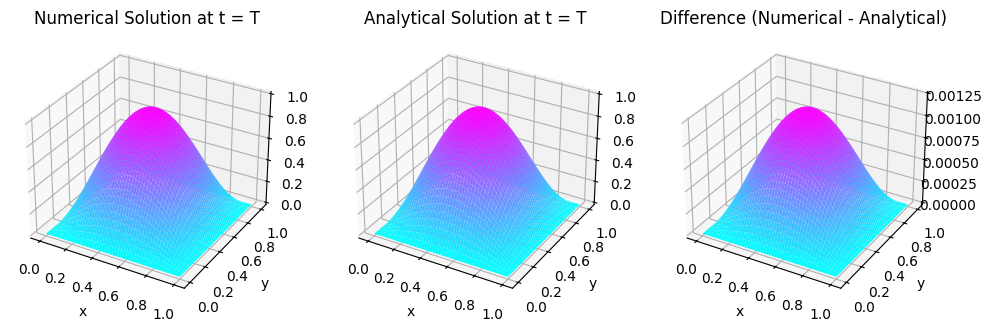

In [15]:
# Analytical solution after one oscillation (t = T)
u_analytical = analytical_solution(X, Y, T, GH)

# Plotting the numerical solution (3D plot)
fig = plt.figure(figsize=(12, 5), dpi=100)

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, u, cmap='cool')
ax1.set_title('Numerical Solution at t = T')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plotting the analytical solution (3D plot)
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, u_analytical, cmap='cool')
ax2.set_title('Analytical Solution at t = T')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Plotting the difference between numerical and analytical solutions (3D plot)
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, np.abs(u - u_analytical), cmap='cool')
ax3.set_title('Difference (Numerical - Analytical)')
ax3.set_xlabel('x')
ax3.set_ylabel('y')

#plt.tight_layout()
plt.show()


## Question 2

### Line Plot Comparison for u(x, 0.5, t) (Q2)

Plotting the numerical and analytical solutions for `u(x, 0.5, t)` at several time steps.


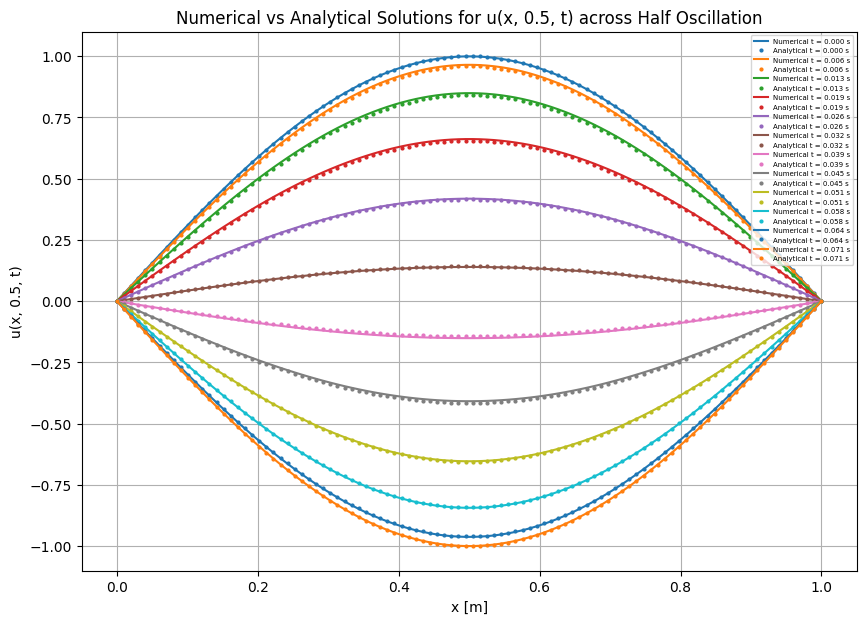

In [16]:
# # Part 2: Line graphs at y = 0.5 m for several times
# Extract numerical and analytical solutions along the line y = 0.5
y_mid_index = Ny // 2  # Index corresponding to y = 0.5

# Create the plot
plt.figure(figsize=(10, 7), dpi=100)

for idx, t in enumerate(time_instances):
    # Analytical solution along y = 0.5 for given time
    u_analytical = analytical_solution(x, 0.5, t, GH)
    
    # Numerical solution at y = 0.5 for given time
    u_numerical = numerical_solutions[idx][:, y_mid_index]

    # Assign a color from the color cycle
    color = f'C{idx % 10}'  
    
    # Plot numerical solution as lines
    plt.plot(x, u_numerical, label=f'Numerical t = {t:.3f} s', color=color, linestyle='-', markersize=2)
    
    # Plot analytical solution as markers
    plt.plot(x, u_analytical, label=f'Analytical t = {t:.3f} s', marker='o', color=color, linestyle='None', markersize=2)

# Formatting the plot
plt.title('Numerical vs Analytical Solutions for u(x, 0.5, t) across Half Oscillation')
plt.xlabel('x [m]')
plt.ylabel('u(x, 0.5, t)')
plt.legend(loc='upper right', fontsize=5)
plt.grid(True)
plt.show()


## Question 3

### Discretization Error vs Grid Spacing (Q3)

Calculating the discretization error \( \epsilon \) for different grid spacings \( \Delta x \) while keeping the Courant number constant. 
Plotting the error against grid spacing and fit a curve to determine the convergence rate.

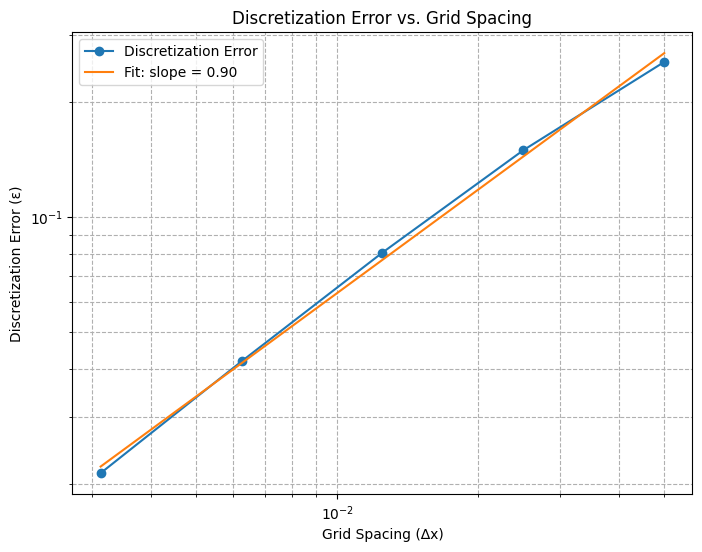

Estimated convergence rate: 0.90


In [17]:
# Function to compute numerical solution for given Nx, Ny
def compute_numerical_solution(Nx, Ny, GH, T):
    Lx, Ly = 1.0, 1.0
    dx = Lx / Nx
    dt = C * dx / np.sqrt(GH)  # Compute dt using fixed Courant number

    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)

    # Initial condition (same as before)
    u = np.sin(np.pi * X) * np.sin(np.pi * Y)
    u_old = u.copy()
    u_new = np.zeros_like(u)

    Nt = int(T / dt)
    GH_dt2_dx2 = (GH * dt ** 2) / dx ** 2  # Precompute constant part

    for n in range(Nt):
        # Vectorized update for interior points
        u_new[1:-1, 1:-1] = (
            2 * u[1:-1, 1:-1] - u_old[1:-1, 1:-1] +
            GH_dt2_dx2 * (
                u[2:, 1:-1] + u[:-2, 1:-1] + u[1:-1, 2:] + u[1:-1, :-2] - 4 * u[1:-1, 1:-1]
            )
        )
        if n == 0:
            # Special update for the first time step
            u_new[1:-1, 1:-1] = (
                u[1:-1, 1:-1] - u_old[1:-1, 1:-1] +
                0.5 * GH_dt2_dx2 * (
                    u[2:, 1:-1] + u[:-2, 1:-1] + u[1:-1, 2:] + u[1:-1, :-2] - 4 * u[1:-1, 1:-1]
                )
            ) + u[1:-1, 1:-1]
        
        # Swap references (in-place update)
        u_old, u = u, u_new

    return X, Y, u


# Grid resolutions to test
grid_resolutions = [20, 40, 80, 160, 320]

errors = []
dx_values = []

for N in grid_resolutions:
    # Compute numerical solution
    X, Y, u_numerical = compute_numerical_solution(N, N, GH, T)
    
    # Compute analytical solution at final time
    u_analytical = analytical_solution(X, Y, T, GH)
    
    # Calculate the discretization error using L2 norm
    dx_values.append(1 / N)
    error = np.sqrt(dx_values[-1]**2*np.sum((u_numerical - u_analytical) ** 2))
    errors.append(error)
    

# Plot error against dx
plt.figure(figsize=(8, 6))
plt.loglog(dx_values, errors, marker='o', label="Discretization Error")

# Fit a line to the data to determine convergence rate
coefficients = np.polyfit(np.log(dx_values), np.log(errors), 1)
plt.loglog(dx_values, np.exp(coefficients[1]) * np.array(dx_values) ** coefficients[0],
           label=f'Fit: slope = {coefficients[0]:.2f}')

plt.xlabel("Grid Spacing (∆x)")
plt.ylabel("Discretization Error (ε)")
plt.title("Discretization Error vs. Grid Spacing")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Print out convergence rate
print(f"Estimated convergence rate: {coefficients[0]:.2f}")



## Question 5


###  Evolution of the Manufactured Solutions

Plotting the evolution of the manufactured solutions over time and comparing them to the numerical solution.


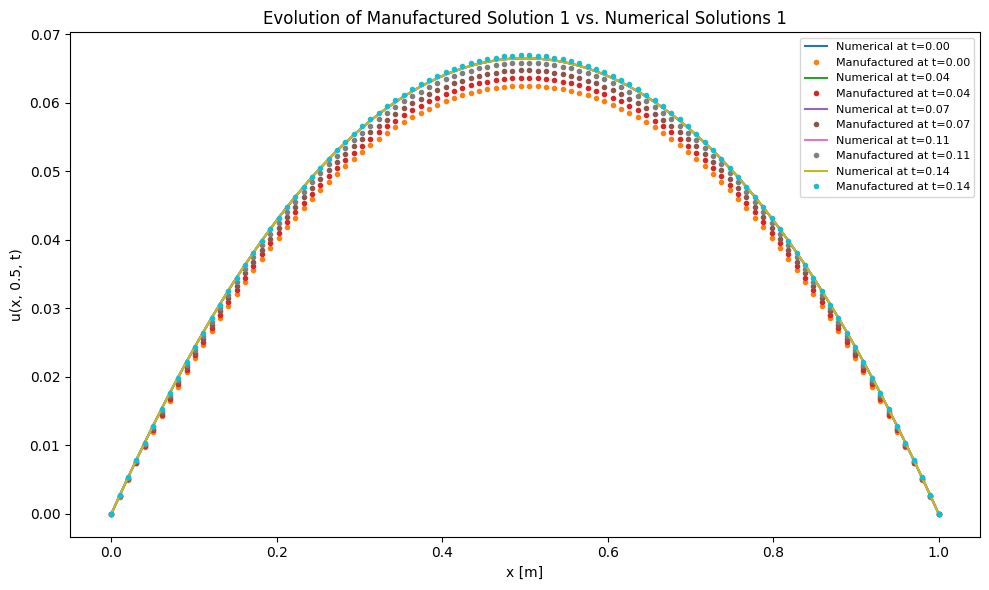

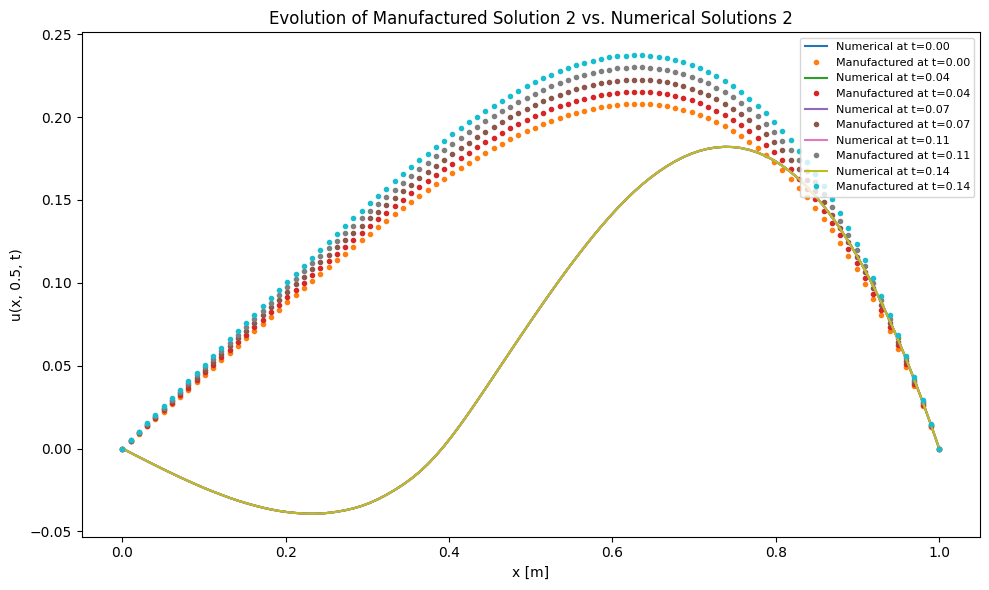

In [18]:
# Define manufactured solutions and source terms
def manufactured_solution_1(x, y, t):
    return (x - x**2) * (y - y**2) * (1 + 0.5 * t)

def source_term_1(x, y, t):
    return GH * (t + 2) * (x - x**2 + y - y**2)

def g_1(x, y):
    return 0.5 * (x - x**2) * (y - y**2)

def manufactured_solution_2(x, y, t):
    return (x - x**4) * (y - y**4) * (1 + t)

def source_term_2(x, y, t):
    return 12 * GH * (t + 1) * (y**2 * (x - x**4) + x**2 * (y - y**4))

def g_2(x, y):
    return (x - x**4) * (y - y**4)

# Function to compute numerical solution with source term
def compute_numerical_solution_with_source(T, source_func, g_func):
    Lx, Ly = 1.0, 1.0
    dx = Lx / Nx
    dt = C * dx / np.sqrt(GH)  # Compute dt using fixed Courant number
    
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)
    
    # Initialize the numerical solution with the manufactured solution at t = 0
    u = manufactured_solution_1(X, Y, 0)
    u_old = u.copy()
    u_new = np.zeros_like(u)
    
    Nt = int(T / dt)
    
    # Precompute constant
    coeff = GH * dt ** 2 / dx ** 2
    
    for n in range(Nt):
        t = n * dt
        source = source_func(X, Y, t)  # Calculate the source term at current time step
        g = g_func(X, Y)
        
        # Vectorized update for u_new, without nested loops
        u_new[1:-1, 1:-1] = (
            2 * u[1:-1, 1:-1]
            - u_old[1:-1, 1:-1]
            + coeff * (
                u[2:, 1:-1] + u[:-2, 1:-1] + u[1:-1, 2:] + u[1:-1, :-2] - 4 * u[1:-1, 1:-1]
            )
            + dt**2 * source[1:-1, 1:-1] + dt * g[1:-1, 1:-1]
        )
        
        u_old = u.copy()
        u = u_new.copy()
    
    return X, Y, u

manufactured_solution_terms = [manufactured_solution_1, manufactured_solution_2]
source_terms = [source_term_1, source_term_2]
g_terms = [g_1, g_2]

for i in range(2):
    # Compute the numerical solution once and reuse it
    X, Y, u_numerical = compute_numerical_solution_with_source(T, source_terms[i], g_terms[i])
    
    # Compare with manufactured solution at final time
    u_manufactured = manufactured_solution_terms[i](X, Y, T)

    # Visualize the evolution of u(x, 0.5, t) for several times using line graphs
    times = [0, 0.25 * T, 0.5 * T, 0.75 * T, T]
    
    plt.figure(figsize=(10, 6), dpi=100)

    for t in times:
        u_num = u_numerical[:, int(Ny / 2)]  # Use precomputed numerical solution
        u_man = manufactured_solution_terms[i](X[:, int(Ny / 2)], Y[:, int(Ny / 2)], t)
        
        plt.plot(X[int(Ny / 2), :], u_num, label=f'Numerical at t={t:.2f}', markersize=3, linestyle='-')
        plt.plot(X[int(Ny / 2), :], u_man, label=f'Manufactured at t={t:.2f}', marker='o', markersize=3, linestyle='')

    plt.xlabel('x [m]')
    plt.ylabel('u(x, 0.5, t)')
    plt.title(f'Evolution of Manufactured Solution {i+1} vs. Numerical Solutions {i+1}')
    plt.legend(loc='upper right', fontsize=8)
    plt.tight_layout()
    plt.show()


## Question 6

### Plot Error ϵ Against Time t

Calculating and plotting the error as a function of time by comparing the numerical solution with the manufactured solution.

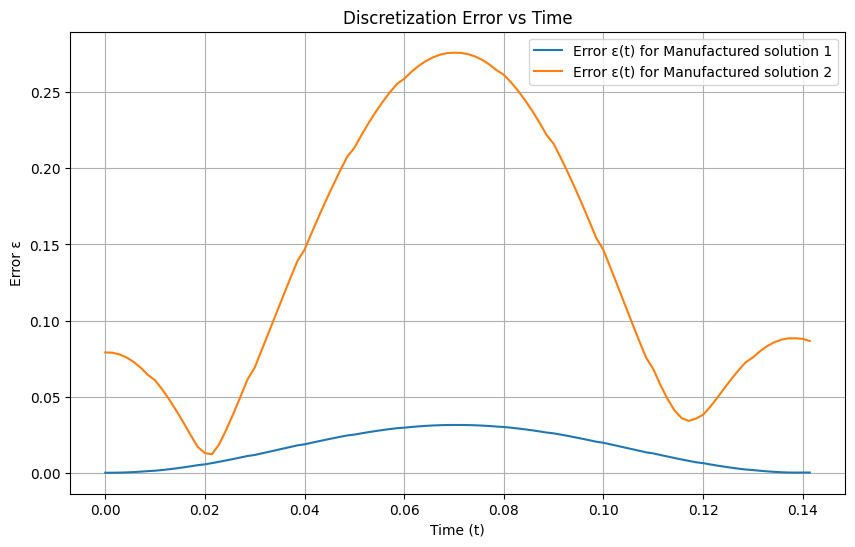

In [19]:

# Error calculation function
def compute_error(u_numerical, u_manufactured):
    return np.sqrt(dx**2*np.sum((u_numerical - u_manufactured) ** 2))

# Precompute grids and constants
Lx, Ly = 1.0, 1.0
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Time array
times = np.linspace(0, T, 100)

# Compute errors for both manufactured solutions
errors1 = []
errors2 = []

for t in times:
    # For manufactured solution 1
    X, Y, u_numerical1 = compute_numerical_solution_with_source(t, source_terms[0], g_terms[0])
    u_manufactured1 = manufactured_solution_terms[0](X, Y, t)
    error1 = compute_error(u_numerical1, u_manufactured1)
    errors1.append(error1)

    # For manufactured solution 2
    X, Y, u_numerical2 = compute_numerical_solution_with_source(t, source_terms[1], g_terms[1])
    u_manufactured2 = manufactured_solution_terms[1](X, Y, t)
    error2 = compute_error(u_numerical2, u_manufactured2)
    errors2.append(error2)

# Plot error against time
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(times, errors1, label="Error ε(t) for Manufactured solution 1")
plt.plot(times, errors2, label="Error ε(t) for Manufactured solution 2")
plt.xlabel("Time (t)")
plt.ylabel("Error ε")
plt.title("Discretization Error vs Time")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()


## Question 9


### Plot the displacement at u(0.5 m, 0.5 m, t) against t.
Include the Python solution with lines and COMSOL with markers

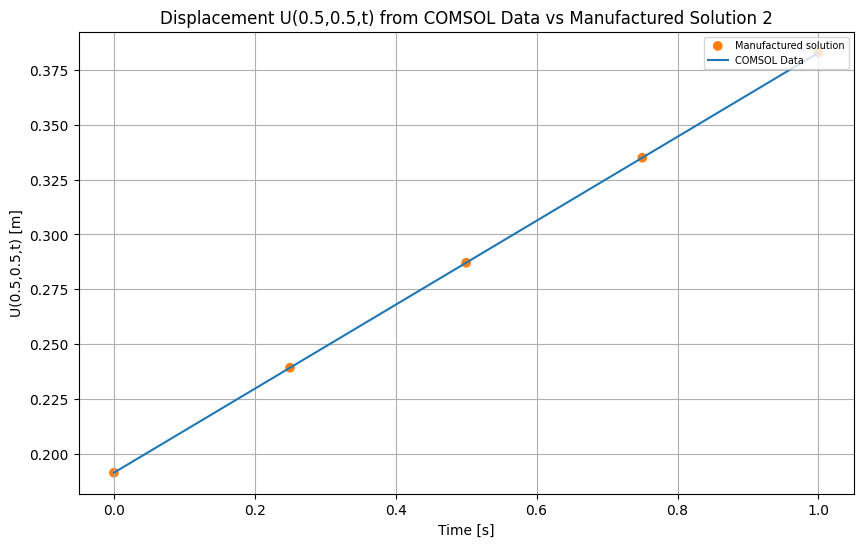

In [20]:

filename = "data.csv"

comsol_data = []
# Read CSV file
with open(filename) as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    for i in range(5):
        next(reader, None)  # skip the headers
    comsol_data = [row for row in reader]

x_data = [float(row[0]) for row in comsol_data]
y_data = [float(row[1]) for row in comsol_data]



# Visualize the evolution of u(x, 0.5, t) for several times using line graphs
times = [0, 0.25, 0.5, 0.75, 1]

plt.figure(figsize=(10, 6), dpi=100)

# Plot the manufactured solution for each time step (same color, label only once)
for i, t in enumerate(times):
    u_man = manufactured_solution_terms[1](0.5, 0.5, t)
    if i == 0:
        plt.scatter(t, u_man, label='Manufactured solution', color='C1', marker='o', linestyle='')
    else:
        plt.scatter(t, u_man, color='C1', marker='o', linestyle='')
plt.plot(x_data, y_data, label="COMSOL Data")
plt.xlabel("Time [s]")
plt.ylabel("U(0.5,0.5,t) [m]")
plt.title("Displacement U(0.5,0.5,t) from COMSOL Data vs Manufactured Solution 2")
plt.grid(True)
plt.legend(loc="upper right", fontsize=7)
plt.show()